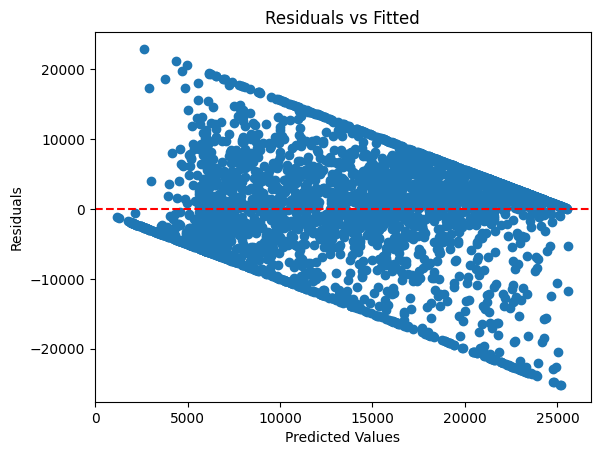

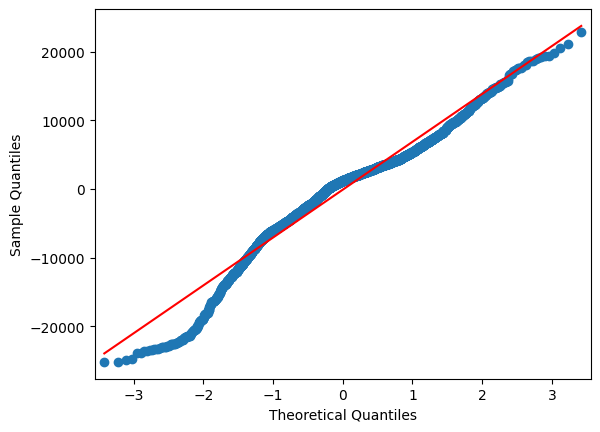

Shapiro-Wilk test result: ShapiroResult(statistic=0.9586750435953966, pvalue=2.979281498439716e-29)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/NvWCPg2u12Tza1js.csv')  # Ensure this points to the correct file

# Encode categorical variables using get_dummies
data_encoded = pd.get_dummies(data, columns=['Race', 'Eduacation', 'Hisp', 'MaritalStatus'], drop_first=True)

# Ensure all data is numeric and finite
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')  # Coerce errors will convert non-numeric to NaN
data_encoded = data_encoded.dropna()  # Drop any rows with NaN values

# Prepare the data
X = data_encoded.drop('Earnings_1978', axis=1)  # All other columns are features
y = data_encoded['Earnings_1978']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Check for Linearity and Homoscedasticity
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Check for Normality of Residuals
qqplot(residuals, line='s')
plt.show()

# Normality test
print("Shapiro-Wilk test result:", shapiro(residuals))

# Checking for Multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Optionally, check for homoscedasticity formally
_, pval, _, _ = het_breuschpagan(residuals, X_train)
print('Breusch-Pagan test P-value:', pval)
